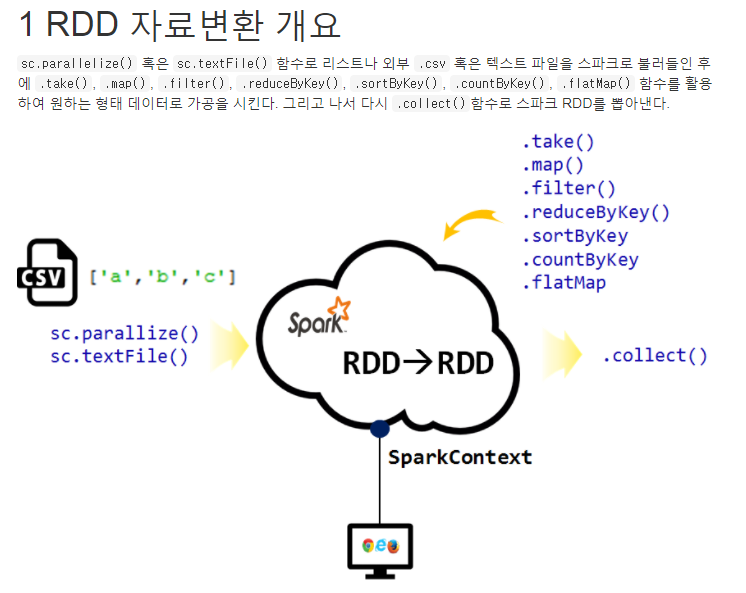

# rdd 변환기초

- 리스트 RDD 변환
    - 파이썬 리스트 데이터 객체를 스파크 RDD로 클러스터에 올린 후에 .map() 함수로 연산작업을 수행한다. 그리고 나서 다시 스파크에서 파이썬으로 RDD 객체를 빼내는데 .collect() 함수를 사용해서 가져온다

- 외부 데이터  리스트 RDD변환
    - .csv 데이터를 sc.textFile() 함수로 불러와서 RDD 객체로 변환시킨다.
    - 람다함수등으로 추출변환등을 하여 새로운 RDD객체를 생성 

- 파이썬 딕셔너리 활용
 
     -튜플 리스트로 데이터가 준비된 경우 각 정당별(key) 득표수(value)에 대한 합을 구하는 경우, 
    스파크 클러스터를 활용하지 않고 데이터가 작은 경우 defaultdict() 함수를 활용해서 계산하는 것이 가능하다.

In [ ]:
from collections import defaultdict
# 튜플 리스트
party_list = [('민주당',1), ('바른미래',2), ('자유한국',3), ('민주당',30), ('바른미래',20), ('자유한국',10)]
party_dict = defaultdict(int)
# 정당별 합을 구하는 과정
for party, vote in party_list:
    party_dict[party] += vote
# 정당별 합을 출력
for party, vote in party_dict.items():
    print(party, ":", vote)

In [ ]:
민주당 : 31
바른미래 : 22
자유한국 : 13

In [ ]:
- 스파크 RDD reduceByKey() 함수
    -튜플 리스트를 스파크에 넣어 RDD로 변환시킨 후에 reduceByKey()함수를 사용해서 키값을
    기준으로 값(Value)에 대한 연산작업을 수월히 수행할 수 있다.

In [ ]:
party_rdd = sc.parallelize(party_list)

# 정당별 총합 계산
party_total_rdd = party_rdd.reduceByKey(lambda x, y: x+y).sortByKey(ascending=True)

# 정당별 총합을 계산하고 내림차순으로 정렬
for num in party_total_rdd.collect():
  print(num)

In [ ]:
# 출력결과 -------------
('민주당', 31)
('바른미래', 22)
('자유한국', 13)

In [ ]:
- 판다스 데이터프레임 변환
    -튜플 리스트를 pd.DataFrame() 함수로 판다스 데이터프레임으로 변환을 시킨 후에 
    groupby() 연산을 사용해서 정당별 득표수 합을 구한다

In [ ]:
import pandas as pd
party_df = pd.DataFrame(party_list, columns=['party', 'vote'])
print(party_df.groupby('party').sum())

In [ ]:
      vote
party      
민주당      31
바른미래     22
자유한국     13

# 원스텝더!
텍스트 리스트를 sc.parallelize() 함수로 데이터를 가져온다. 그리고 나서 type() 명령어로 자료형이 RDD라는 사실을 확인한다.
sc.textFile() 함수로 외부 .csv 데이터를 가져올 경우 minPartitions인자를 설정하여 원본 데이터, 
즉 빅데이터를 몇조각으로 나눌지 지정할 수 있다.

In [ ]:
 단어 리스트를 바탕으로 RDD 객체 생성
list_rdd = sc.parallelize(["빅데이터는", "스파크로", "스몰 데이터는", "데이터프레임으로"])
# RDD 자료형 확인
print("RDD 자료형: ", type(list_rdd))

# 단어 리스트를 바탕으로 파티션 반영 RDD 객체 생성
iris_partition_rdd = sc.textFile("data/iris.csv", minPartitions=3)
# RDD 자료형 확인
print("RDD 자료형: ", type(iris_partition_rdd), "\n파티션 갯수:", iris_partition_rdd.getNumPartitions())

In [ ]:
# 출력결과 -----------------------
The type of RDD is <class 'pyspark.rdd.RDD'>

# 출력결과 -----------------------
RDD 자료형:  <class 'pyspark.rdd.RDD'> 
파티션 갯수: 3

In [ ]:
실수업내용

In [ ]:
dd01 = sc.range(0, 1000, 1, 2)
# 객체
rdd01
# 파티션 갯수 확인
rdd01.getNumPartitions()
# 출력
rdd01.collect()
rdd01.take(5)

# 홀수만
rdd02 = rdd01.filter(lambda x: x%2)
# 짝수만
rdd03 = rdd01.filter(lambda x: not x%2)